# Song genre classification

### ABSTRACT 

In this project we will be using the a Spotify Dataset which contains 5 different Genres which are Samba,Hip-hop, Rock , Pop , Funk, Carioca and Sertanejo.
The aim of this project is to create a classifer which can classify into the separate categories.
The data consisits of 2 separate files which are artists and lyrics.
They have a common column between them which is Alink and this is used to mergre the two data frames and we get one dataframe.



### 

In [68]:
from spacy import displacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tqdm
import torch
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
# import transformers as ppb # pytorch transformers
from sklearn.metrics import precision_recall_fscore_support

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

This shows that there is one GPU available for processing the data in tensorflow background.
This is a GTX1660Ti and we are going to train all the deep learning models on this library

### Aim of the Project
Since we are going to classifiy the genre we only need to have the lyrics and the genre for each of the lyrics.
So now we are going to preprocess the whole dataset into just lyrics and genre.


In [142]:
df_artist = pd.read_csv ('artists-data.csv')
df_songlist  =  pd.read_csv ('lyrics-data.csv')
df_new = df_artist.rename(columns={'Link': 'ALink'})
## Here we are only going to take the ENGLSIH Songs.
new_df_songlist = df_songlist[df_songlist['Idiom'] == 'ENGLISH']

In [299]:
## Merging both the dataframes based on a common link ALink
df_merge = pd.merge(new_df_songlist,df_new,on = 'ALink')
## Check for null values 
df_merge.isnull().sum()
# Removal of null values
df_merge.dropna(inplace = True) 
df_merge.isnull().sum()
df_merge.head()

,ALink,SName,SLink,Lyric,Idiom,Artist,Songs,Popularity,Genre,Genres
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
2,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
3,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
4,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...


In [300]:
def count_words(text):
    len_words = len([word for word in text.split()])
    return len_words

In [301]:
word_distribution = df_merge.Lyric.apply(count_words)

In [321]:
df_subset = df_merge[['Lyric', 'Genre']]

In [322]:
df_subset

,Lyric,Genre
0,I could feel at the time. There was no way of ...,Rock
1,I could feel at the time. There was no way of ...,Pop
2,"Take me now, baby, here as I am. Hold me close...",Rock
3,"Take me now, baby, here as I am. Hold me close...",Pop
4,These are. These are days you'll remember. Nev...,Rock
...,...,...
124225,Well sometimes I go out by myself. And I look ...,Rock
124226,Feeling my way through the darkness. Guided by...,Samba
124227,Feeling my way through the darkness. Guided by...,Rock
124228,"Don't, don't, that's what you say. Each time t...",Samba


In [323]:
df_subset['word_count'] = word_distribution

D:\Anaconda\envs\gpu_access\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [324]:
df_subset

,Lyric,Genre,word_count
0,I could feel at the time. There was no way of ...,Rock,145
1,I could feel at the time. There was no way of ...,Pop,145
2,"Take me now, baby, here as I am. Hold me close...",Rock,238
3,"Take me now, baby, here as I am. Hold me close...",Pop,238
4,These are. These are days you'll remember. Nev...,Rock,172
...,...,...,...
124225,Well sometimes I go out by myself. And I look ...,Rock,273
124226,Feeling my way through the darkness. Guided by...,Samba,251
124227,Feeling my way through the darkness. Guided by...,Rock,251
124228,"Don't, don't, that's what you say. Each time t...",Samba,112


In [325]:
df_subset = df_subset.drop_duplicates(subset='Lyric')

In [326]:
df_subset

,Lyric,Genre,word_count
0,I could feel at the time. There was no way of ...,Rock,145
2,"Take me now, baby, here as I am. Hold me close...",Rock,238
4,These are. These are days you'll remember. Nev...,Rock,172
6,"A lie to say, ""O my mountain has coal veins an...",Rock,263
8,Trudging slowly over wet sand. Back to the ben...,Rock,118
...,...,...,...
124216,"(Chorus). Hello, hello,hello,how low. Hello,he...",Samba,149
124224,Well sometimes I go out by myself. And I look ...,Samba,273
124226,Feeling my way through the darkness. Guided by...,Samba,251
124228,"Don't, don't, that's what you say. Each time t...",Samba,112


In [327]:
smallest, largest, median_lyric =  [f(df_subset.word_count) for f in [np.min, np.max, np.median]]

In [328]:
df_subset

,Lyric,Genre,word_count
0,I could feel at the time. There was no way of ...,Rock,145
2,"Take me now, baby, here as I am. Hold me close...",Rock,238
4,These are. These are days you'll remember. Nev...,Rock,172
6,"A lie to say, ""O my mountain has coal veins an...",Rock,263
8,Trudging slowly over wet sand. Back to the ben...,Rock,118
...,...,...,...
124216,"(Chorus). Hello, hello,hello,how low. Hello,he...",Samba,149
124224,Well sometimes I go out by myself. And I look ...,Samba,273
124226,Feeling my way through the darkness. Guided by...,Samba,251
124228,"Don't, don't, that's what you say. Each time t...",Samba,112


In [165]:
##Remove all the data values which are below 15 

In [330]:
df_subset=df_subset[df_subset.word_count >15 ]

In [331]:
df_subset

,Lyric,Genre,word_count
0,I could feel at the time. There was no way of ...,Rock,145
2,"Take me now, baby, here as I am. Hold me close...",Rock,238
4,These are. These are days you'll remember. Nev...,Rock,172
6,"A lie to say, ""O my mountain has coal veins an...",Rock,263
8,Trudging slowly over wet sand. Back to the ben...,Rock,118
...,...,...,...
124216,"(Chorus). Hello, hello,hello,how low. Hello,he...",Samba,149
124224,Well sometimes I go out by myself. And I look ...,Samba,273
124226,Feeling my way through the darkness. Guided by...,Samba,251
124228,"Don't, don't, that's what you say. Each time t...",Samba,112


In [332]:
from tabulate import tabulate
pdf=pd.DataFrame(df_subset.Genre.value_counts())
print(tabulate(pdf ,headers = 'keys', tablefmt = 'presto'))
plt.savefig('test2.png', bbox_inches="tight" )
plt.show()

              |   Genre
--------------+---------
 Rock         |   47312
 Pop          |   25306
 Hip Hop      |   13555
 Sertanejo    |      43
 Samba        |      40
 Funk Carioca |      14


<Figure size 432x288 with 0 Axes>

In [333]:
print(smallest)
print(largest)
print(median_lyric)

1
3301
232.0


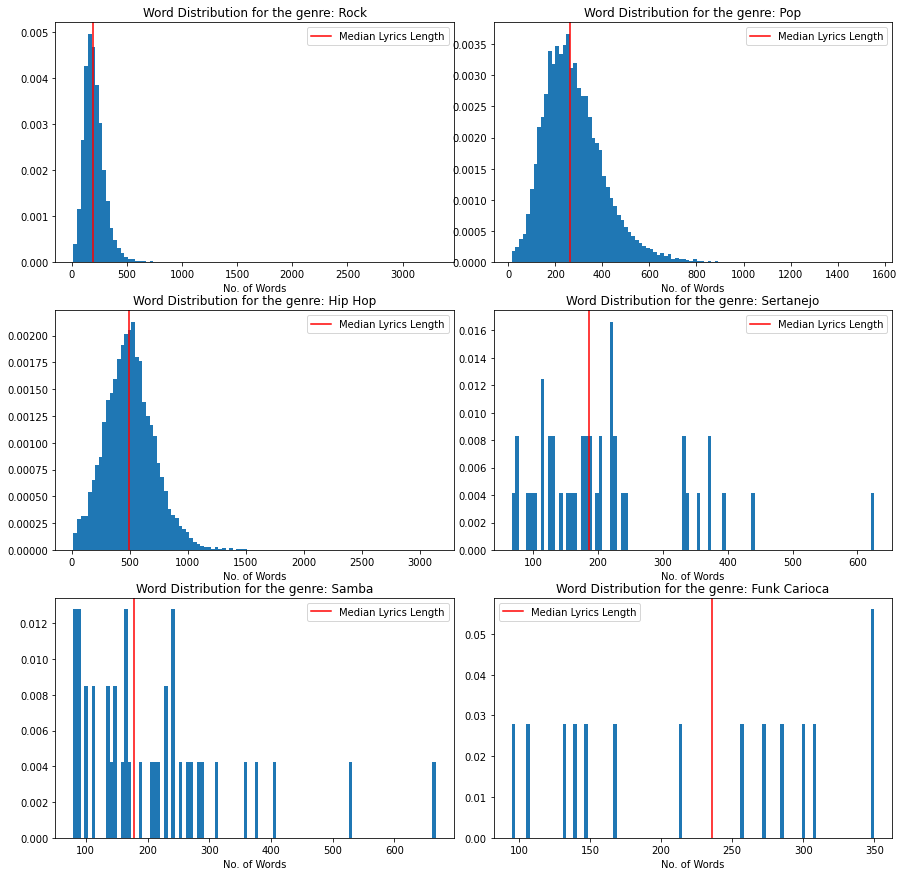

In [335]:
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=.1)

axs = axs.ravel()


for i,genre in enumerate(df_subset.Genre.unique()):
    genre_median = np.median(df_subset.word_count[df_subset.Genre==genre])
    axs[i].set_title(f"Word Distribution for the genre: {genre}")
    axs[i].hist(df_subset.word_count[df_subset.Genre==genre], bins=100, density=True)
    axs[i].set_xlabel("No. of Words")
    axs[i].axvline(x=genre_median, color='red', label="Median Lyrics Length")
    axs[i].legend()
#     plt.show()
# for i in range(6):

#     axs[i].contourf(np.random.rand(10,10),6,cmap=plt.cm.Oranges)

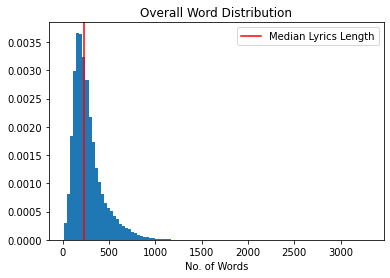

In [336]:
plt.title(f"Overall Word Distribution")
plt.hist(df_subset.word_count, bins=100, density=True)
plt.axvline(x = median_lyric, color='red', label='Median Lyrics Length')
plt.xlabel("No. of Words")
plt.legend()
plt.show()

## Unbalanced dataset

In [337]:
# GenreDF = df_merge.loc[:,['Genre','Lyric']]
df_subset

,Lyric,Genre,word_count
0,I could feel at the time. There was no way of ...,Rock,145
2,"Take me now, baby, here as I am. Hold me close...",Rock,238
4,These are. These are days you'll remember. Nev...,Rock,172
6,"A lie to say, ""O my mountain has coal veins an...",Rock,263
8,Trudging slowly over wet sand. Back to the ben...,Rock,118
...,...,...,...
124216,"(Chorus). Hello, hello,hello,how low. Hello,he...",Samba,149
124224,Well sometimes I go out by myself. And I look ...,Samba,273
124226,Feeling my way through the darkness. Guided by...,Samba,251
124228,"Don't, don't, that's what you say. Each time t...",Samba,112


### Make labels for all the Genres 


In [338]:
possible_labels = df_subset['Genre'].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Rock': 0,
 'Pop': 1,
 'Hip Hop': 2,
 'Sertanejo': 3,
 'Samba': 4,
 'Funk Carioca': 5}

In [246]:
# df_subset['label'] = GenreDF['Genre'].replace(label_dict)

In [347]:
df_subset['Genre'].unique()

array(['Rock', 'Pop', 'Hip Hop', 'Sertanejo', 'Samba', 'Funk Carioca'],
      dtype=object)

In [353]:
options = ['Rock','Hip Hop','Pop'] 
    
# selecting rows based on condition 
df_filtered = df_subset.loc[df_subset['Genre'].isin(options)] 


In [354]:
df_filtered['Genre'].value_counts()

Rock       47312
Pop        25306
Hip Hop    13555
Name: Genre, dtype: int64

In [352]:
import re
from sklearn.model_selection import train_test_split
def format_str(str_):
    str_ = re.sub('[|\[\]*.,!:?\"\'«»]', '', str_)
    str_ = re.sub('[-–——]+', ' ', str_)
    str_ = str_.strip()
    str_ = str_.lower()
    return str_

In [355]:
y = df_filtered['Genre']
X = df_filtered['Lyric'].apply(format_str)

In [356]:
##Test train split
# Use this as the baseline so only X_train1 and y_train1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

## Balancing the datasets

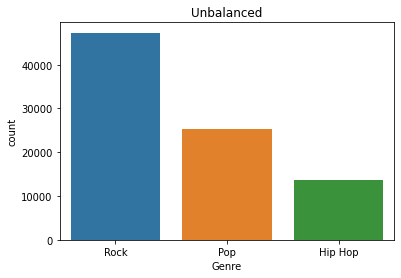

In [357]:
import seaborn as sns
Genres = df_filtered['Genre'].value_counts()

sns.countplot(x="Genre", data=df_filtered).set(title="Unbalanced")
# fig = ax.get_figure()
# ax.savefig('CountPlotUnbalanced.png')
plt.savefig('Unbalanced Genre Class.png')

Remove Funk Carioca and Samba and the other shit that we call christmas


In [370]:
Undersampled = []
for i in df_filtered['Genre'].unique():
    Undersampled.append(df_filtered[GenreDF['Genre']== i].sample(Genres.min()))
Undersampleddf = pd.concat(Undersampled).sample(len(Undersampleddf)).reset_index(drop = True)

D:\Anaconda\envs\gpu_access\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [374]:
Undersampleddf['Genre'].value_counts()

Rock       13555
Pop        13555
Hip Hop    13555
Name: Genre, dtype: int64

[Text(0.5, 1.0, 'Unbalanced')]

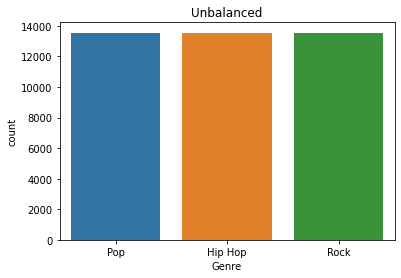

In [377]:
import seaborn as sns
Genres = Undersampleddf['Genre'].value_counts()
sns.countplot(x="Genre", data=Undersampleddf).set(title="Unbalanced")

The dataset is made ready with a balanced dataset with equal number of samples of each genre.
The dataset is undersampled in order to get equal samples as the one in the genre with minimum samples.

In [381]:
y = Undersampleddf['Genre']
X = Undersampleddf['Lyric'].apply(format_str)

In [382]:
##Test train split
# Use this as the baseline so only X_train1 and y_train1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [254]:
# Undersampleddf
# GenresUS = Undersampleddf['Genre'].value_counts()
# ax = sns.countplot(x="Genre", data=Undersampleddf).set(
#     title="Balanced")
# # GenresUS
# ax.figure.saveplot('CountplotbalancedImages.png')

In [255]:
# X_under = Undersampleddf['Lyric'].apply(format_str)
# y_under = Undersampleddf['Genre']

In [256]:
# ### Test Train split unbalanced
# X_trainUS, X_testUS, y_trainUS, y_testUS = train_test_split(X_under, y_under, test_size=0.30, random_state=100)

### Wordcloud depiction of each Genre

In [257]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [260]:
for i in df_subset['Genre'].unique():
    print(i)

Rock
Pop
Hip Hop
Sertanejo
Samba
Funk Carioca


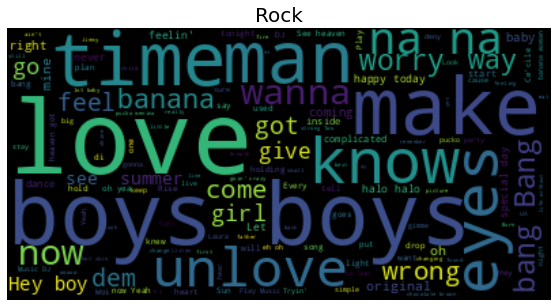

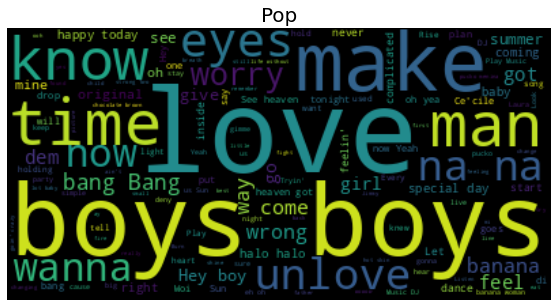

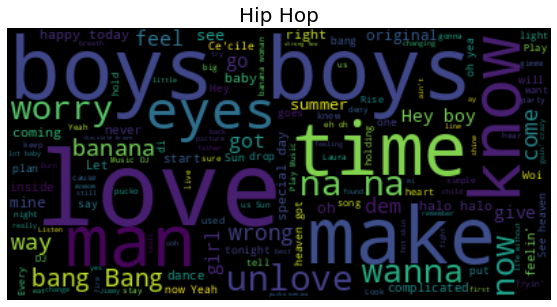

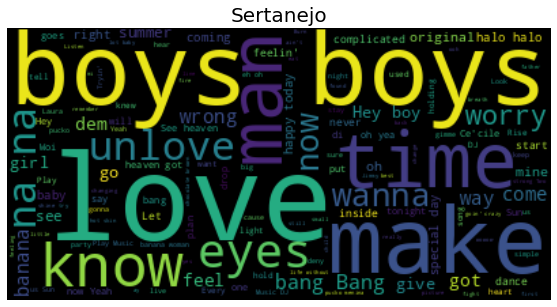

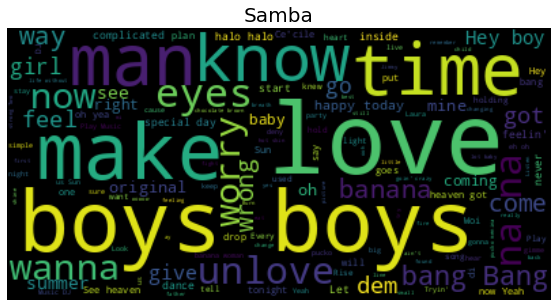

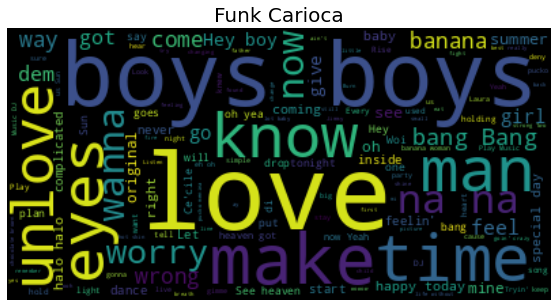

In [261]:
undersampled = {}
for i in df_subset['Genre'].unique():
    undersampled[i]=df_subset[df_subset['Genre']== i]
# wordcloud = {}

for i in df_subset['Genre'].unique():
    a = df_subset.groupby('Genre')['Lyric'].apply(' '.join).reset_index()
    wordcloud = WordCloud().generate(a['Lyric'][0])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.title(label = i,fontsize=20,color='Black')
    

plt.savefig('WordCloud.png')

In [24]:
# #  Categorical Data
# a = 2  # number of rows
# b = 3  # number of columns
# c = 1  # initialize plot counter

# fig = plt.figure(figsize=(40,15))
# for i in GenreDF['Genre'].unique():
#     plt.subplot(a, b, c)
#     plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
#     plt.xlabel(i)
#     cloud = Undersampled[i].groupby('Genre')['Lyric'].apply(' '.join).reset_index()
#     wordcloud = WordCloud().generate(cloud['Lyric'][0])
#     # plt.figure(figsize=(30,15))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off") 
#     plt.title(label = i,fontsize=20,color='Black')
#     # sns.countplot(df[i])
#     c = c + 1
# plt.show()
# # for i in heart_CAT:
# #     plt.subplot(a, b, c)
# #     plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
# #     plt.xlabel(i)
# #     sns.countplot(df[i])
# #     c = c + 1

# plt.show()
# plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/WordCloud.png')

### Stopwords

If we are running Tf-idf vectorizer then addition of stop words would not be a big problem as tf-idf take s the inverse rate in whcih all the frequently occuring words are given a lower score as comparted to the words that occur less frequently.
Hence for each genre we will have words that are speific inclined to that genre.


### Tokenization using spacy

The next step is to tokenize using spacy's inbuilt tokenizer.
We would need to add the above stop words to spacy's tokenizer as well.

In [383]:
####Import the spacy small library
import spacy
nlp = spacy.load("en_core_web_sm")
# nlp.Defaults.stop_words |= {'love','know','oh'}

In [26]:
##Check all the stop words in spacy
# all_stopwords = nlp.Defaults.stop_words

In [27]:
##This is to sentencise each of the document
# sbd = nlp.create_pipe()
# nlp.add_pipe('sentencizer')
# doc = nlp(text)
# sents_list = []
# for sent in doc.sents:
#     sents_list.append(sent.text)
# print(sents_list)

In [384]:
# Function to preprocess the data (Remove stop words,Lemmatize adn check for alphabhets only in given documents)
def preprocess2(text):
    doc = nlp(text)
    return[words.lemma_.lower() for words in doc if words.is_alpha] 
# return[words.lemma_.lower() for words in doc if words.is_alpha and not words.is_stop] 

## Tf-Idf vectorization

The reason we choose Tf-idf vectorization is because we have a lot of repeated words which do not contribute to the classification of the genre so Tf-idf takes the inverse log giving more weight to the words which are less frequently used and less weightage to the words that are frequently used.


In [385]:
%%time
##Tf-idf Vectoriser
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=preprocess2,stop_words='english',use_idf=True, 
                             smooth_idf=True)


Wall time: 0 ns


In [391]:
%%time
X_train_text = vectorizer.fit_transform(X_train)
X_test_text = vectorizer.transform(X_test)

Wall time: 28min 47s


In [269]:
%%time
# X_train_textUS = vectorizer.fit_transform(X_trainUS)
# X_test_textUS = vectorizer.transform(X_testUS)

Wall time: 0 ns


In [63]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [33]:

%%time
##Tf-idf Vectoriser
# vectorizer2 = Word2Vec(sentences=X_train)

Wall time: 0 ns


In [34]:
# vectorizer2.most_similar['rock']

### Dimensionality reduction using LSA

Topic models are built around the idea that the semantics of our document are actually being governed by some hidden, or topics that shape the meaning of our document and corpus. <br>LSA along with SVD can help with topic modelling on a text corpus.

In [393]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize

In [394]:
#SVD for dimensionality reduction
svd_model = TruncatedSVD(n_components=100,algorithm='randomized',n_iter=10)

In [395]:
import random

random.seed(10)
SVD_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
# SVD_matrix = SVD_transformer.fit_transform(X_train)

In [171]:
%%time 
## Transforming test 
# SVD_matrix_test = SVD_transformer.transform(X_test)

Wall time: 0 ns


In [396]:
%%time 
SVD_matrix_trainUS = SVD_transformer.fit_transform(X_train)
## Transforming test 
SVD_matrix_testUS = SVD_transformer.transform(X_test)

Wall time: 27min 47s


## Train LogisticClassifier

In [48]:
# %%time
# logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
# logit.fit(X_train_text, y_train)

In [49]:
# %%time
# logit2 = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
# logit2.fit(SVD_matrix, y_train)

In [404]:
%%time
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit.fit(X_train_text, y_train)

Wall time: 7.03 s


LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

In [405]:
%%time
logit_svd = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit_svd.fit(SVD_matrix_trainUS, y_train)

Wall time: 4.12 s


LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

### Logistic Regression CV

In [61]:
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [62]:
# %%time
# cv_results = cross_val_score(logit, X_train_text, y_train, cv=skf, scoring='f1_micro')

In [63]:
# cv_results, cv_results.mean()

## Inference for K Fold crossvalidation

Using K-fold cross validation with k=5 we get the the validation score of each of the k set close to .50.
By this analogy we can go ahead with the train test split.

## Cross Validation Under sampled

In [407]:
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [408]:
%%time
# cv_results = cross_val_score(logit3, X_train_textUS, y_trainUS, cv=skf, scoring='f1_micro')

Wall time: 0 ns


In [409]:
# cv_results, cv_results.mean()

## Inference

It is observed that after undersampling we the data and running it on unseen data we get a lower score.This could be because the previous data was very imbalanced and biased.

### Test Logistic regression

In [410]:
logit.score(X_test_text,y_test)

0.6833886634698143

In [51]:
##LSA
# logit2.score(SVD_matrix_test,y_test)

In [412]:
logit_svd.score(SVD_matrix_testUS,y_test)

0.6528956104758392

### Inference 

From using SVD we seem to be getting a lower score as compared to simple tf-idf-vectorization.


In [54]:
# categories = y_test.unique()
# cm = confusion_matrix(logit.predict(X_test_text),y_test)
# make_confusion_matrix(cm,categories = categories)

In [70]:
# cm = confusion_matrix(logit2.predict(SVD_matrix_test),y_test)
# make_confusion_matrix(cm,categories = categories)
from sklearn.metrics import confusion_matrix

In [602]:

result_dict= {'LR':precision_recall_fscore_support(y_test, logit.predict(X_test_text), average='weighted'),
              'LR_LSA': precision_recall_fscore_support(y_test, logit_svd.predict(SVD_matrix_testUS), average='weighted'),
             'LR_CE':precision_recall_fscore_support(y_test_context, logit3.predict(X_test_context), average='weighted')}
# precision_recall_fscore_support(y_testUS, logit3.predict(X_test_textUS), average='macro')
# precision_recall_fscore_support(y_testUS, logit4.predict(SVD_matrix_testUS), average='macro')

In [603]:
result_dict

{'LR': (0.6872439181870856, 0.6833886634698143, 0.6849967730244857, None),
 'LR_LSA': (0.659652322043232, 0.6528956104758392, 0.6541239811022146, None),
 'LR_CE': (0.7717634862166516, 0.7898578811369509, 0.772679506865069, None)}

In [416]:
%run SongClassification.py

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16391772866097006872
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4183621632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9979970207640130834
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


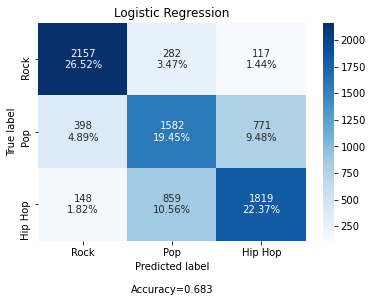

In [419]:
# from google.colab import files
categories = y_test.unique()
cm = confusion_matrix(logit.predict(X_test_text),y_test)
m = make_confusion_matrix(cm,categories = categories)
plt.title('Logistic Regression')
# plt.tight_layout()
plt.savefig('Logistic_normal.png',bbox_inches='tight')
# files.download('/archive/CF1.png') 

In [74]:
precision_recall_fscore_support(y_testUS, logit4.predict(SVD_matrix_testUS), average='macro')

(0.48960113960113966, 0.44060292133047546, 0.45214783200264147, None)

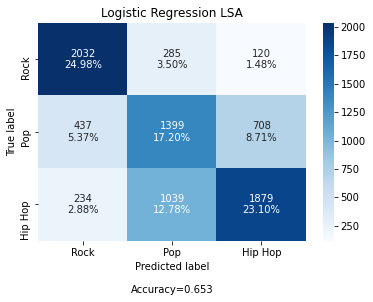

In [420]:
# from google.colab import files
cm = confusion_matrix(logit_svd.predict(SVD_matrix_testUS),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('Logistic Regression LSA')
plt.savefig('LogisticSVD.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF2.png') 

We do not notice Samba in the imbalaced dataset as it is the least in number.
It is present in the balanced dataset.
In the imbalanced dataset there is a large number of songs belonging to rock,Hip-Hop and Funk Carioca  which is why is there it
shows a higher accuracy as compared to the others.
Using the Latent semanic analysis we have increased the accuracy of by a very small percentage.

## Train using Naive Bayes Multinomial

In [421]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB    
from sklearn.naive_bayes import CategoricalNB

In [77]:
# XNB = normalize(svd_matrix, norm='l2', axis=1, copy=True, return_norm=True)
# XNBUS = normalize(SVD_matrixUS, norm='l2', axis=1, copy=True, return_norm=True)

In [428]:
%%time
nbclfGNB = GaussianNB()
nbclfMNB = MultinomialNB()
nbclfCNB = CategoricalNB()

Wall time: 0 ns


In [426]:
nbclfGNB.fit(X_train_text.toarray(), y_train)

MemoryError: Unable to allocate 18.4 GiB for an array with shape (32532, 75996) and data type float64

In [604]:
result_dict

nbclfGNB.score(X_test_textUS.toarray(),y_testUS)

NameError: name 'X_test_textUS' is not defined

In [430]:
nbclfMNB.fit(X_train_text, y_train)

MultinomialNB()

In [438]:
# categories = y_train.unique()
# cm = confusion_matrix(nbclfGNB.predict(X_test_text),y_test)
# make_confusion_matrix(cm,categories = categories)
# plt.title('Gaussian Naive Bayes')
# plt.savefig('MultinomialNaiveBayes.png',bbox_inches='tight')
# # files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF3.png') 

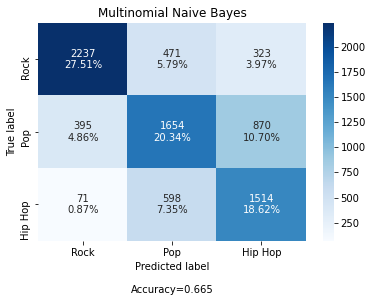

In [435]:
categories = y_train.unique()
cm = confusion_matrix(nbclfMNB.predict(X_test_text),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('Multinomial Naive Bayes')
plt.savefig('Multinomial Naive Bayes.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF4.png') 

In [441]:
# nbclfMNB.fit(SVD_matrix_trainUS, y_train)

In [442]:
# categories = y_train.unique()
# cm = confusion_matrix(nbclfMNB.predict(SVD_matrix_trainUS),y_test)
# make_confusion_matrix(cm,categories = categories)
# plt.title('Multinomial Naive Bayes')
# plt.savefig('Multinomial Naive Bayes.png',bbox_inches='tight')
# # files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF4.png') 

## Test NaiveBayes

In [96]:
nbclfGNB.score(X_test_textUS.toarray(),y_testUS)

0.425531914893617

In [97]:
nbclfMNB.score(X_test_textUS,y_testUS)

0.39361702127659576

In [608]:
# result_dict['NB_Gaussian'] = precision_recall_fscore_support(y_testUS, nbclfGNB.predict(X_test_textUS.toarray()),average='macro')
result_dict['NB_Multinomial']=precision_recall_fscore_support(y_test, nbclfMNB.predict(X_test_text),average='macro')

In [610]:
result_dict.pop('NB_Mulinomial')

(0.6660712192423669, 0.6647693268363527, 0.6619326407683944, None)

In [611]:
result_dict


{'LR': (0.6872439181870856, 0.6833886634698143, 0.6849967730244857, None),
 'LR_LSA': (0.659652322043232, 0.6528956104758392, 0.6541239811022146, None),
 'LR_CE': (0.7717634862166516, 0.7898578811369509, 0.772679506865069, None),
 'NB_Multinomial': (0.6660712192423669,
  0.6647693268363527,
  0.6619326407683944,
  None)}

## RandomForest Classifier

In [443]:
from sklearn.ensemble import RandomForestClassifier

In [444]:
rfclf = RandomForestClassifier(random_state=42)

In [446]:
rfclf.fit(X_train_text, y_train)

RandomForestClassifier(random_state=42)

In [448]:
rfclf.score(X_test_text,y_test)

0.6947006024837084

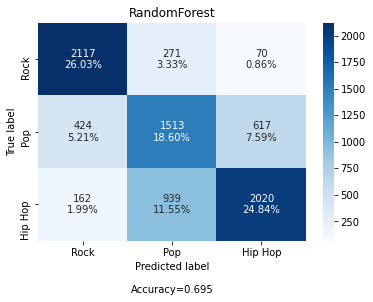

In [449]:
cm = confusion_matrix(rfclf.predict(X_test_text),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest')
plt.savefig('RandomForest.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF5.png') 

RandomForest with a default parameters are giving a score of .30 . A better model can be achieved by hyper tuning these parameters.A grid search CV can be implemented in order to find the best estimates.

#### Fine-Tuning Parameters :
    

In [450]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [5,10,15,20,25,30],
#     'min_samples_leaf': [2,3, 4, 5,6],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100,110,120,130,140,150, 200]
# }
# # Create a based model
# rf = RandomForestClassifier(random_state=0)
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)
# grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 5, n_jobs = -1, verbose = 2)

In [451]:
# %timeit
# random.seed(10)
# grid_search.fit(X_train_textUS, y_trainUS)

In [452]:
# cm = confusion_matrix(grid_search.predict(X_test_textUS),y_testUS)
# make_confusion_matrix(cm,categories = categories)
# plt.title('RandomForest TunedParams')
# plt.savefig('CF6.png',bbox_inches='tight')
# # files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF6.png') 

In [453]:
# grid_search.score(X_test_textUS,y_testUS)

In [81]:
# scorelist = []

# for i in range(1,20):
#     rfclf = RandomForestClassifier(max_depth=i, random_state=0)
#     rfclf.fit(X_train_textUS, y_trainUS)
#     scorelist.append(rfclf.score(X_test_textUS,y_testUS))
    

In [82]:
# treelist = []

# for i in range(100,150):
#     rfclf = RandomForestClassifier(max_depth=11, random_state=0,n_estimators = i)
#     rfclf.fit(X_train_textUS, y_trainUS)
#     treelist.append(rfclf.score(X_test_textUS,y_testUS))
    

In [83]:
# treelist.index(max(treelist))


In [84]:
# plt.plot(scorelist)

In [85]:
# scorelist.index(max(scorelist))

It was observed that after hyper tuning the parameters and setting it as the maximum attained from the following we are getting a higher accuracy rate from using the RandomForestclassifier.


In [454]:
rfclfSVD = RandomForestClassifier()


In [456]:
rfclfSVD.fit(SVD_matrix_trainUS, y_train)

RandomForestClassifier()

In [458]:
rfclfSVD.score(SVD_matrix_testUS,y_test)

0.6354358785196115

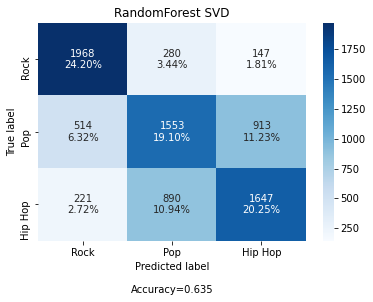

In [460]:
cm = confusion_matrix(rfclfSVD.predict(SVD_matrix_testUS),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest SVD')
plt.savefig('RandomForest SVD.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF7.png') 

In [461]:
# grid_search2.fit(SVD_matrixUS, y_trainUS)

In [462]:
# grid_search2.score(SVD_matrix_testUS, y_testUS)

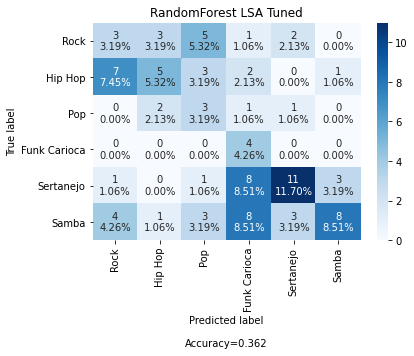

In [92]:
cm = confusion_matrix(grid_search2.predict(SVD_matrix_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest LSA Tuned')
plt.savefig('CF8.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF8.png') 

In [613]:
result_dict['RF']= precision_recall_fscore_support(y_test, rfclf.predict(X_test_text),average = 'macro')
# result_dict['RF_Tuned']=precision_recall_fscore_support(y_testUS, grid_search.predict(X_test_textUS),average = 'macro')
result_dict['RF_LSA']=precision_recall_fscore_support(y_test, rfclfSVD.predict(SVD_matrix_testUS),average = 'macro')
# result_dict['RF_LSA_Tuned']=precision_recall_fscore_support(y_testUS, grid_search2.predict(SVD_matrix_testUS),average = 'macro')
result_dict['RF_CE'] = precision_recall_fscore_support(y_test_context, rfclf_context.predict(X_test_context),average = 'macro')

In [615]:
result_dict


{'LR': (0.6872439181870856, 0.6833886634698143, 0.6849967730244857, None),
 'LR_LSA': (0.659652322043232, 0.6528956104758392, 0.6541239811022146, None),
 'LR_CE': (0.7717634862166516, 0.7898578811369509, 0.772679506865069, None),
 'NB_Multinomial': (0.6660712192423669,
  0.6647693268363527,
  0.6619326407683944,
  None),
 'RF': (0.7003006163723798, 0.6950181776569438, 0.6956735789829057, None),
 'RF_LSA': (0.646674901019291, 0.635609788218025, 0.6398126174407585, None),
 'RF_CE': (0.7448505239519555, 0.6351084163651808, 0.6482315800916315, None)}

## XGBoost

In [113]:
X_train_textUS

<218x3595 sparse matrix of type '<class 'numpy.float64'>'
	with 13063 stored elements in Compressed Sparse Row format>

In [114]:
!pip install xgboost

In [463]:
from xgboost import XGBClassifier

In [479]:
xgbmodel = XGBClassifier(booster = 'gbtree',subsample= 1.0, min_child_weight= 1, max_depth= 5, gamma= 0.2, colsample_bytree= 0.6)
xgbmodelSVD = XGBClassifier(booster = 'gbtree',subsample= 1.0, min_child_weight= 1, max_depth= 5, gamma= 0.2, colsample_bytree= 0.6) 

In [618]:
xgbmodel.fit(X_train_text.astype('float'),y_train)

D:\Anaconda\envs\gpu_access\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [619]:
xgbmodel.score(X_test_text,y_test)

0.7062584532152957

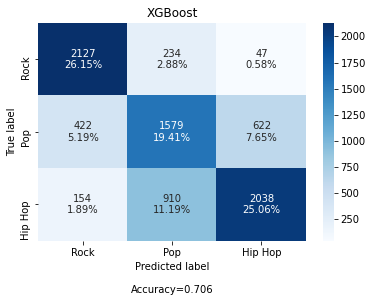

In [478]:
categories = y_test.unique()
cm = confusion_matrix(xgbmodel.predict(X_test_text),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('XGBoost')
plt.savefig('XGBoost.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF9.png') 

In [480]:
xgbmodelSVD.fit(SVD_matrix_trainUS,y_train)

D:\Anaconda\envs\gpu_access\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [481]:
xgbmodelSVD.score(SVD_matrix_testUS,y_test)

0.6564613303823927

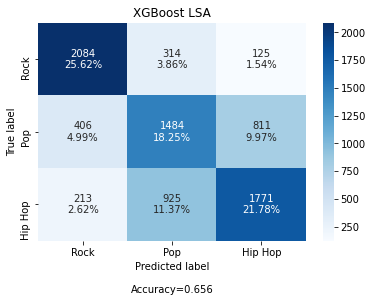

In [482]:
cm = confusion_matrix(xgbmodelSVD.predict(SVD_matrix_testUS),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('XGBoost LSA')
plt.savefig('XGBoost LSA.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF10.png') 

In [483]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [484]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': np.arange(0, 5, .1),
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth':np.arange(0, 10, 1)
#         }

In [485]:
# from sklearn.metrics import roc_auc_score

# folds = 5
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgbmodel, param_distributions=params, n_iter=param_comb,n_jobs=4, cv=skf.split(X_train_textUS,y_trainUS), verbose=3, random_state=1001 )
# random_searchSVD = RandomizedSearchCV(xgbmodelSVD, param_distributions=params, n_iter=param_comb,n_jobs=4, cv=skf.split(X_train_textUS,y_trainUS), verbose=3, random_state=1001 )

In [486]:
# from datetime import datetime
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X_train_textUS, y_trainUS)
# timer(start_time)

In [487]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)

In [488]:
# random_searchSVD.score(SVD_matrix_testUS,y_testUS)

In [489]:
# cm = confusion_matrix(random_searchSVD .predict(SVD_matrix_testUS),y_testUS)
# make_confusion_matrix(cm,categories = categories)
# plt.title('XGBoost LSA Tuned')
# plt.savefig('CF12.png',bbox_inches='tight')
# # files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF12.png') 

In [633]:
result_dict['XBG'] = precision_recall_fscore_support(y_test, xgbmodel.predict(X_test_text),average = 'macro')
# result_dict['XBG_Tuned']=precision_recall_fscore_support(y_testUS, random_search.predict(X_test_textUS),average = 'macro')
result_dict['XBG_LSA']=precision_recall_fscore_support(y_test, xgbmodelSVD.predict(SVD_matrix_testUS),average = 'macro')
# result_dict['XBG_LSA_Tuned']=precision_recall_fscore_support(y_testUS, random_searchSVD.predict(SVD_matrix_testUS),average = 'macro')
result_dict['XGB_CE'] =   precision_recall_fscore_support(y_test_context, xgbmodel_CE.predict(X_test_context),average = 'macro')

In [634]:
result_dict


{'LR': (0.6872439181870856, 0.6833886634698143, 0.6849967730244857, None),
 'LR_LSA': (0.659652322043232, 0.6528956104758392, 0.6541239811022146, None),
 'LR_CE': (0.7717634862166516, 0.7898578811369509, 0.772679506865069, None),
 'NB_Multinomial': (0.6660712192423669,
  0.6647693268363527,
  0.6619326407683944,
  None),
 'RF': (0.7003006163723798, 0.6950181776569438, 0.6956735789829057, None),
 'RF_LSA': (0.646674901019291, 0.635609788218025, 0.6398126174407585, None),
 'RF_CE': (0.7448505239519555, 0.6351084163651808, 0.6482315800916315, None),
 'XBG': (0.7140945324840248, 0.7065471754167016, 0.7082380998825412, None),
 'XBG_LSA': (0.6614090687276409, 0.6567373705722993, 0.6584821179381564, None),
 'XGB_CE': (0.7529775282961153, 0.6966389569634982, 0.7134014089927928, None),
 'SVM_Tuned': (0.7009454385657427,
  0.6908255000930993,
  0.6947212208383183,
  None),
 'SVM_LSA': (0.6592537157623882, 0.6502155543675836, 0.6496812826832419, None),
 'SVM_CE': (0.7572987167768589, 0.7021631467

#### SVM Classifier

In [490]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [491]:
SVMclf = SVC(C = 1.6,kernel='linear',degree = 4)
SVMclfSVD = SVC(C=1.6, kernel='linear', degree=4, gamma='auto')

In [492]:
%time
SVMclf.fit(X_train_text,y_train)

Wall time: 0 ns


SVC(C=1.6, degree=4, kernel='linear')

In [493]:
%time
SVMclfSVD.fit(SVD_matrix_trainUS,y_train)

Wall time: 0 ns


SVC(C=1.6, degree=4, gamma='auto', kernel='linear')

In [494]:
SVMclf.score(X_test_text,y_test)

0.6906430591417682

In [495]:
%time
SVMclfSVD.score(SVD_matrix_testUS,y_test)

Wall time: 0 ns


0.6498217140046724

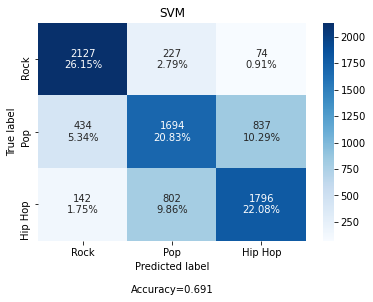

In [496]:
cm = confusion_matrix(SVMclf.predict(X_test_text),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('SVM')
plt.savefig('SVM.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF13.png') 

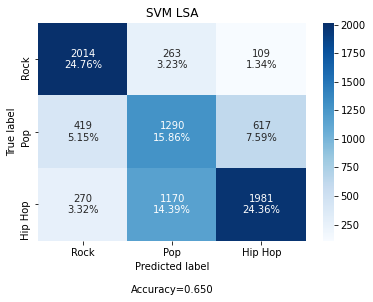

In [497]:
cm = confusion_matrix(SVMclfSVD.predict(SVD_matrix_testUS),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('SVM LSA')
plt.savefig('SVM LSA.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF14.png') 

In [630]:
result_dict['SVM_Tuned'] =  precision_recall_fscore_support(y_test, SVMclf.predict(X_test_text),average = 'macro')
result_dict['SVM_LSA']  =precision_recall_fscore_support(y_test, SVMclfSVD.predict(SVD_matrix_testUS),average = 'macro')
result_dict['SVM_CE'] =   precision_recall_fscore_support(y_test_context, SVMclf_CE.predict(X_test_context),average = 'macro')             

KeyboardInterrupt: 

In [635]:
accuracy = [logit.score(X_test_text,y_test),
logit_svd.score(SVD_matrix_testUS,y_test),
logit3.score(X_test_context,y_test_context),
nbclfMNB.score(X_test_text,y_test),
rfclf.score(X_test_text,y_test),
rfclfSVD.score(SVD_matrix_testUS,y_test),
rfclf_context.score(X_test_context,y_test_context),
xgbmodel.score(X_test_text,y_test),
xgbmodelSVD.score(SVD_matrix_testUS,y_test),
xgbmodel_CE.score(X_test_context,y_test_context),
SVMclf.score(X_test_text,y_test),
SVMclfSVD.score(SVD_matrix_testUS,y_test),
SVMclf_CE.score(X_test_context,y_test_context)]

In [638]:
resultdf['Accuracy'] = accuracy

In [639]:
resultdf

,Precision,Recall,F1-Score,Accuracy
LR,0.687244,0.683389,0.684997,0.683389
LR_LSA,0.659652,0.652896,0.654124,0.652896
LR_CE,0.771763,0.789858,0.772680,0.789858
NB_Multinomial,0.666071,0.664769,0.661933,0.664576
RF,0.700301,0.695018,0.695674,0.694701
RF_LSA,0.646675,0.635610,0.639813,0.635436
RF_CE,0.744851,0.635108,0.648232,0.767183
XBG,0.714095,0.706547,0.708238,0.706258
XBG_LSA,0.661409,0.656737,0.658482,0.656461
XGB_CE,0.752978,0.696639,0.713401,0.790375


Using an SVM linear classifier a score above.45 is attained which after tuning for any value of C higher than 1.

## KNN Classifier

In [498]:
from sklearn.neighbors import KNeighborsClassifier

In [518]:
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh3 = KNeighborsClassifier(n_neighbors=6)
neigh4 = KNeighborsClassifier(n_neighbors=6)

In [519]:
# neigh.fit(X_train_text,y_train)
# neigh2.fit(SVD_matrix, y_train)

In [520]:
neigh3.fit(X_train_text, y_train)
neigh4.fit(SVD_matrix_trainUS, y_train)

KNeighborsClassifier(n_neighbors=6)

In [521]:
neigh3.score(X_test_text,y_test)

0.5148161809910242

In [522]:
neigh4.score(SVD_matrix_testUS,y_test)

0.5671953768597073

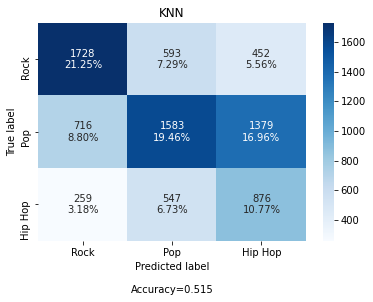

In [523]:
cm = confusion_matrix(neigh3.predict(X_test_text),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('KNN')
plt.savefig('KNN.png',bbox_inches='tight')

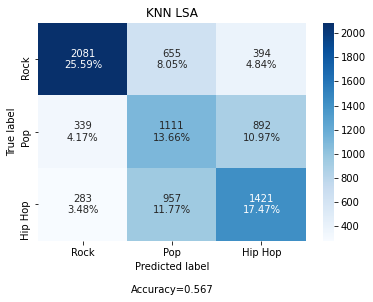

In [524]:
cm = confusion_matrix(neigh4.predict(SVD_matrix_testUS),y_test)
make_confusion_matrix(cm,categories = categories)
plt.title('KNN LSA')
plt.savefig('KNN LSA.png',bbox_inches='tight')

In [152]:
# cm = confusion_matrix(neigh.predict(X_test_text),y_test)
# make_confusion_matrix(cm,categories = categories)

In [153]:
# cm = confusion_matrix(neigh.predict(svd_matrix_test),y_test)
# make_confusion_matrix(cm,categories = categories)

In [154]:
# cm = confusion_matrix(neigh3.predict(X_test_textUS),y_testUS)
# make_confusion_matrix(cm,categories = categories)

In [155]:
# cm = confusion_matrix(neigh4.predict(SVD_matrix_testUS),y_testUS)
# make_confusion_matrix(cm,categories = categories)

In [156]:

# table = [['Logit', 'NaiveBayes', 'KNN'], [logit3.score(X_test_textUS,y_testUS),
#                                           nbclfMNB.score(X_test_textUS,y_testUS),
#                                           neigh3.score(X_test_textUS,y_testUS)]]
         

In [525]:
# result_dict

In [628]:
rdf = pd.DataFrame(result_dict)
resultdf = np.transpose(rdf.drop(3))
resultdf.columns =['Precision', 'Recall','F1-Score']

In [629]:
resultdf

,Precision,Recall,F1-Score
LR,0.687244,0.683389,0.684997
LR_LSA,0.659652,0.652896,0.654124
LR_CE,0.771763,0.789858,0.772680
NB_Multinomial,0.666071,0.664769,0.661933
RF,0.700301,0.695018,0.695674
RF_LSA,0.646675,0.635610,0.639813
RF_CE,0.744851,0.635108,0.648232
XBG,0.714095,0.706547,0.708238
XBG_LSA,0.661409,0.656737,0.658482
XGB_CE,0.752978,0.696639,0.713401


In [527]:
# result_dict['BERT'] = (.381,.313,.307,None)
# result_dict

In [528]:
# resultdf['Accuracy'] = [.447,.436,.372,.394,.447,.404,.383,.479,.457,.404,.447,.426,.426,.404,.333]

In [532]:
data = np.load('contextual_embeddings.npy')

In [533]:
data

array([], shape=(0, 768), dtype=float64)

In [ ]:
!pip install dataframe_image

In [626]:
result_dict

{'LR': (0.6872439181870856, 0.6833886634698143, 0.6849967730244857, None),
 'LR_LSA': (0.659652322043232, 0.6528956104758392, 0.6541239811022146, None),
 'LR_CE': (0.7717634862166516, 0.7898578811369509, 0.772679506865069, None),
 'NB_Multinomial': (0.6660712192423669,
  0.6647693268363527,
  0.6619326407683944,
  None),
 'RF': (0.7003006163723798, 0.6950181776569438, 0.6956735789829057, None),
 'RF_LSA': (0.646674901019291, 0.635609788218025, 0.6398126174407585, None),
 'RF_CE': (0.7448505239519555, 0.6351084163651808, 0.6482315800916315, None),
 'XBG': (0.7140945324840248, 0.7065471754167016, 0.7082380998825412, None),
 'XBG_LSA': (0.6614090687276409, 0.6567373705722993, 0.6584821179381564, None),
 'XGB_CE': (0.7529775282961153, 0.6966389569634982, 0.7134014089927928, None),
 'SVM_Tuned': (0.7009454385657427,
  0.6908255000930993,
  0.6947212208383183,
  None),
 'SVM_LSA': (0.6592537157623882, 0.6502155543675836, 0.6496812826832419, None),
 'SVM_CE': (0.7572987167768589, 0.7021631467

In [640]:
import dataframe_image as dfi
df_styled = resultdf.style.background_gradient()
dfi.export(df_styled,'Table.png')


In [ ]:
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False) 
# print(tabulate(resultdf,tablefmt='fancy_grid',headers = ['Model','Precision', 'Recall','F1-Score','Accuracy'],showindex =True))
table(ax,resultdf)
plt.savefig('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/Table.png')
# with open('table.txt', 'w') as f:
    # f.write(tabulate(tabulate(resultdf,tablefmt='fancy_grid',headers = ['Model','Precision', 'Recall','F1-Score','Accuracy'],showindex =True)))

In [ ]:
# print(tabulate(table,tablefmt='fancy_grid', headers='firstrow',showindex =True))

##  Word2Vec

Preprocessing the simple model

Gensim automatically removes punctuation s and also converts to  lower case

In [541]:
Word2Vec_train = X_train.apply(gensim.utils.simple_preprocess)

In [543]:
Word2Vec_test = X_test.apply(gensim.utils.simple_preprocess)

In [546]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count= 2,
    workers = 6)


In [547]:
model.build_vocab(X_train,progress_per = 1000)

In [549]:
model.epochs

5

In [550]:
model.corpus_count

32532

In [551]:
model.train(X_train,total_examples = model.corpus_count,epochs = model.epochs)

(44865457, 259828050)

In [552]:
model.save("./word2vecmodel")

In [566]:
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

D:\Anaconda\envs\gpu_access\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  after removing the cwd from sys.path.


In [ ]:
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [ ]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [ ]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df_subset, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['post']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

## Contextual BERT

In [567]:
Context_bert= np.load('contextual_embeddings.npy')
ContextBertShort = np.load('contextual_embeddings 77400.npy')

In [575]:
df_filtered.loc[:77399,'Genre']

0        Rock
1        Rock
2        Rock
3        Rock
4        Rock
         ... 
77395     Pop
77396     Pop
77397     Pop
77398     Pop
77399     Pop
Name: Genre, Length: 77400, dtype: object

In [576]:
df_filtered.reset_index(drop = True,inplace = True)
df_filtered_labels = df_filtered.loc[:77399,'Genre']

In [577]:
X_train_context, X_test_context, y_train_context, y_test_context = train_test_split(ContextBertShort, df_filtered_labels, test_size=0.20, random_state=100,shuffle = True)

In [563]:
Context_bert.shape

(124229, 768)

In [570]:
ContextBertShort.shape

(77400, 768)

In [579]:
%%time

logit3 = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit3.fit(X_train_context, y_train_context)

Wall time: 59.5 s


LogisticRegression(C=50.0, multi_class='multinomial', n_jobs=4, random_state=17)

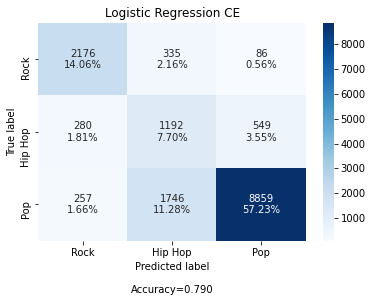

In [641]:
# from google.colab import files
categories = y_test_context.unique()
cm = confusion_matrix(logit3.predict(X_test_context),y_test_context)
m = make_confusion_matrix(cm,categories = categories)
plt.title('Logistic Regression CE')
# plt.tight_layout()
plt.savefig('Logistic_CE.png',bbox_inches='tight')
# files.download('/archive/CF1.png') 

## Multinomial Naive Bayes

In [584]:
nbclfMNB1 = MultinomialNB()

In [586]:
# nbclfMNB1.fit(X_train_context, y_train_context)

In [587]:
# categories = y_train_context.unique()
# cm = confusion_matrix(nbclfMNB.predict(X_train_context),y_test)
# make_confusion_matrix(cm,categories = categories)
# plt.title('Multinomial Naive Bayes')
# plt.savefig('Multinomial Naive Bayes.png',bbox_inches='tight')
# # files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF4.png') 

## Random Forest

In [588]:
rfclf_context = RandomForestClassifier(random_state=42)

rfclf_context.fit(X_train_context, y_train_context)

rfclf_context.score(X_test_context,y_test_context)



0.7671834625322997

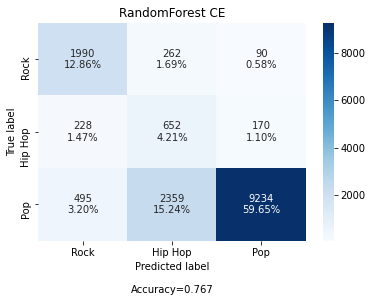

In [590]:
cm = confusion_matrix(rfclf_context.predict(X_test_context),y_test_context)
make_confusion_matrix(cm,categories = categories)
plt.title('RandomForest CE')
plt.savefig('RandomForest CE.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF5.png') 

## XGBoost

In [591]:
xgbmodel_CE = XGBClassifier(booster = 'gbtree',subsample= 1.0, min_child_weight= 1, max_depth= 5, gamma= 0.2, colsample_bytree= 0.6)
# xgbmodelSVD = XGBClassifier(booster = 'gbtree',subsample= 1.0, min_child_weight= 1, max_depth= 5, gamma= 0.2, colsample_bytree= 0.6) 

xgbmodel_CE.fit(X_train_context.astype('float'),y_train_context)

xgbmodel_CE.score(X_test_context,y_test_context)


D:\Anaconda\envs\gpu_access\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.790374677002584

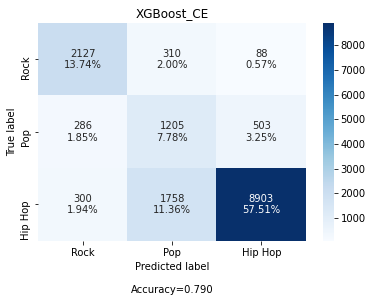

In [592]:
categories = y_test_context.unique()
cm = confusion_matrix(xgbmodel_CE.predict(X_test_context),y_test_context)
make_confusion_matrix(cm,categories = categories)
plt.title('XGBoost_CE')
plt.savefig('XGBoost_CE.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF9.png') 

## SVM

In [593]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

SVMclf_CE = SVC(C = 1.6,kernel='linear',degree = 4)


%time
SVMclf_CE.fit(X_train_context,y_train_context)



SVMclf_CE.score(X_test_context,y_test_context)




Wall time: 0 ns


0.7958010335917313

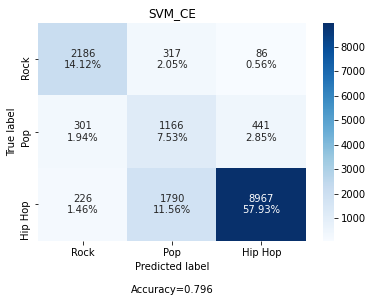

In [595]:
cm = confusion_matrix(SVMclf_CE.predict(X_test_context),y_test_context)
make_confusion_matrix(cm,categories = categories)
plt.title('SVM_CE')
plt.savefig('SVM_CE.png',bbox_inches='tight')
# files.download('/content/drive/MyDrive/SongClassification[Genre,Lyrics]/archive/CF13.png') 

## KNN

In [596]:
neigh_CE = KNeighborsClassifier(n_neighbors=6)

# neigh.fit(X_train_text,y_train)
# neigh2.fit(SVD_matrix, y_train)


neigh_CE.fit(X_train_context,y_train_context)

neigh_CE.score(X_test_context,y_test_context)


0.7041989664082687

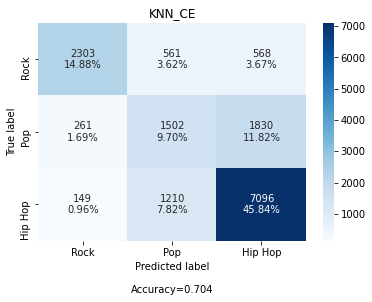

In [598]:

cm = confusion_matrix(neigh_CE.predict(X_test_context),y_test_context)
make_confusion_matrix(cm,categories = categories)
plt.title('KNN_CE')
plt.savefig('KNN_CE.png',bbox_inches='tight')

## Song Genre Classification using BERT

Since the words used in songs are of different genres are very similar but the meaning of these words might differ in each of these genres.
To tackle this problem we can iuntroduce sequential learning models of whcih Bidirectional Encoder Representations from Transformers (BERT) which is a transformer-based machine learning technique for NLP.

song genre is very correlatted to the certain sentences and is dependant on the sentence

BERT has BERT base and BERT large .

Base has 12 encoders and BERT large has 24.

__Masked Language Model:__


A saved Bert model which has 12 layers and 768 hidden states is used.
A HubKeras layer will be used to use the over the bert preprocessor and encoder.
The preprocessed returns the output in the form of a dictionary so we need to use pooled_output in order to get encoding for the entire sentence.
The only limitation here is each of the lyrics is more than the capacity of BERT as it handles only 512 sentences and the lyrics of each song is much higher than that.
Due to this we might get a reduced accuracy of the model.



## Transformers over LSTM 

LSTM is not used as they are very slow adn they are not truly bidirectional.
However transformers adresses these concerns as the conext is learnet simultaneouly from both the directions.<br>
It generateds embeddings simultaneously.<br>
If we stack decoders we get GPT and conversely if we stack the encoders we get BERT.

### BERT saved model



In [188]:
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [184]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [185]:
##Setting y to the encoded y labels 
X_under = Undersampleddf['Lyric'].apply(format_str)
y_under = Undersampleddf['label']

In [186]:
### Test Train split unbalanced
X_trainUS, X_testUS, Con_y_trainUS, Con_y_testUS = train_test_split(X_under, y_under, test_size=0.20, random_state=100)

In [189]:
%time 
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

Wall time: 0 ns


OSError: SavedModel file does not exist at: C:\Users\nandu\AppData\Local\Temp\tfhub_modules\602d30248ff7929470db09f7385fc895e9ceb4c0\{saved_model.pbtxt|saved_model.pb}

In [190]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocessor(text_input)
outputs = bert_encoder(preprocessed_text)
##We take 6 as the number of nodes as it the number of categories are 6
##Dropout is taken as 10 percent
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(10, input_dim=6, activation='softmax')
l = tf.keras.layers.Dense(6, activation='softmax', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

NameError: name 'bert_preprocessor' is not defined

In [191]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

NameError: name 'model' is not defined

In [ ]:
model.summary()

In [ ]:
model.fit(X_trainUS, Con_y_trainUS, epochs=1)

In [ ]:
model.evaluate(X_testUS,Con_y_testUS)

In [ ]:
cm = confusion_matrix(model.predict(X_testUS),Con_y_testUS)
make_confusion_matrix(cm,categories = categories)

In [ ]:
y_predicted = model.predict(X_testUS)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### BERT ONE-HOT encoding of labels

In [192]:
def labels_to_onehot(labels):
    # labels_catg = string_to_int_labels(labels)
    a = np.array(labels)
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    return b

In [193]:
y_train_ENC = labels_to_onehot(Con_y_trainUS)
y_test_ENC = labels_to_onehot(Con_y_testUS)

In [194]:
y_train_ENC

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [195]:
tf.config.run_functions_eagerly(True)

In [196]:
model.fit(X_trainUS, y_train_ENC, epochs=3)

NameError: name 'model' is not defined

In [ ]:
model.evaluate(X_testUS,y_testUS)

In [ ]:
cm = confusion_matrix(model.predict(X_testUS),y_testUS)
make_confusion_matrix(cm,categories = categories)

## BERT Multi-nomial text classification

In [61]:

import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

False

In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_trainUS.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)
encoded_data_val = tokenizer.batch_encode_plus(
    X_testUS.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(Con_y_trainUS.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(Con_y_testUS.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:

from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'/content/drive/MyDrive/BERT_epochs{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

# model.to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/BERT_epochs1.model', map_location=torch.device('cpu')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

### Bibliography

{cite:p}`weinberg1995retinoblastoma`

@article{weinberg1995retinoblastoma,
  title={The retinoblastoma protein and cell cycle control},
  author={Weinberg, Robert A},
  journal={cell},
  volume={81},
  number={3},
  pages={323--330},
  year={1995},
  publisher={Elsevier}
}